Prof : Rodrigo Targino

Student: Carla Machinez

In [60]:
from collections import Counter
import math
import sys
import numpy as np
import matplotlib.pyplot as plt

The code below follows the steps:

                        1) Load the data;
                        2) Inicialize the K you want;
                        3) For each example:
                        3.1) Calculate de distance between the query and the data;
                        3.2) Add the distance and the index of the example in a ordered collection;
                        4) Sort the ordered collection in ascending order by distance;
                        5) Pick the first K entries;
                        6) Get their labels;
                        7) Return the mean of the K labels
                        

In [3]:
def mean(labels):
    return sum(labels) / len(labels)

In [4]:
def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

In [5]:
#1) and 2)
def knn(data, query, k, distance_function, f):
    neighbor_distances_and_indices = []
    
    # 3) 
    for index, example in enumerate(data):
        # 3.1)
        distance = distance_function(example[:-1], query)
        
        # 3.2)
        neighbor_distances_and_indices.append((distance, index))
    
    # 4)
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5)
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6)
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices]

    # 7)
    return k_nearest_distances_and_indices , f(k_nearest_labels)


Table of Height (in inches) v Weight (in pounds)

Given the data we have, what's the best-guess at someone's weight if they are some inches tall?

In [7]:
regression_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45],
    ]

For 60 inches tall:

In [64]:
regression_query1 = [66]

In [65]:
regression = knn(regression_data, regression_query1, 3, euclidean_distance, mean)

In [66]:
regression

([(0.25, 0), (0.4899999999999949, 9), (1.7900000000000063, 4)],
 128.24666666666667)

For 70 inches tall:

In [67]:
regression_query2 = [70]

In [68]:
regression2 = knn(regression_data, regression_query2, 3, euclidean_distance, mean)

In [69]:
regression2

([(0.010000000000005116, 7),
  (0.20000000000000284, 6),
  (0.5999999999999943, 2)],
 143.66)

For 68 inches tall:

In [73]:
regression_query3 = [68]

In [74]:
regression3 = knn(regression_data, regression_query3, 3, euclidean_distance, mean)

In [75]:
regression3

([(0.09999999999999432, 8),
  (0.20999999999999375, 4),
  (0.21999999999999886, 3)],
 133.00333333333333)

Amostra:

In [76]:
x = (65.75, 66.49,67.79, 67.90, 68.22, 68.70, 69.40, 69.80,70.01, 71.52)
y = (112.99, 127.45,144.30,112.37,142.34,123.30,153.03,141.49,136.46,136.49)


<function matplotlib.pyplot.show(*args, **kw)>

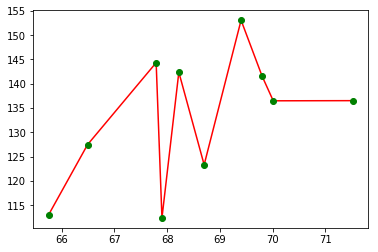

In [77]:
plt.plot(x, y, 'r-',x, y, 'go')
plt.show

Values with k=3:

In [79]:
x_q = (66,68,70)
y_q = (regression[1], regression2[1],regression3[1])

<function matplotlib.pyplot.show(*args, **kw)>

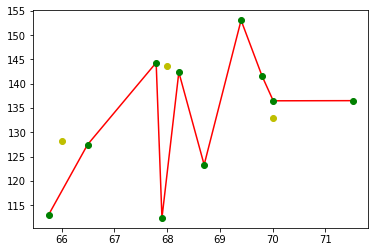

In [80]:
plt.plot(x, y, 'r-',x, y, 'go', x_q, y_q, 'yo')
plt.show

Values with k=5:

In [81]:
regression_query1 = [66]
regression1 = knn(regression_data, regression_query1, 5, euclidean_distance, mean)
regression_query2 = [68]
regression2 = knn(regression_data, regression_query2, 5, euclidean_distance, mean)
regression_query3 = [70]
regression3 = knn(regression_data, regression_query3, 5, euclidean_distance, mean)


<function matplotlib.pyplot.show(*args, **kw)>

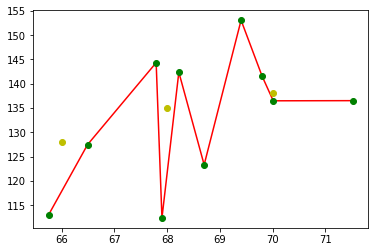

In [63]:
x_q = (66,68,70)
y_q = (regression1[1], regression2[1],regression3[1])
plt.plot(x, y, 'r-',x, y, 'go', x_q, y_q, 'yo')
plt.show

Values with k=7:

In [82]:
regression_query1 = [66]
regression1 = knn(regression_data, regression_query1, 7, euclidean_distance, mean)
regression_query2 = [68]
regression2 = knn(regression_data, regression_query2, 7, euclidean_distance, mean)
regression_query3 = [70]
regression3 = knn(regression_data, regression_query3, 7, euclidean_distance, mean)


<function matplotlib.pyplot.show(*args, **kw)>

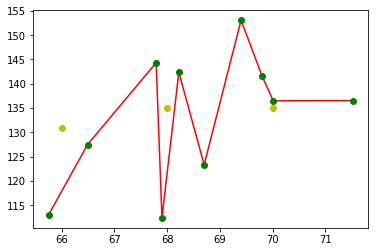

In [83]:
x_q = (66,68,70)
y_q = (regression1[1], regression2[1],regression3[1])
plt.plot(x, y, 'r-',x, y, 'go', x_q, y_q, 'yo')
plt.show